In [4]:
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

In [6]:
reviews_train = load_files('C:/Users/Admin/Desktop/PythonProjects/aclImdb/train',
    categories=['pos', 'neg'])

text_train, y_train = reviews_train.data, reviews_train.target
print("Тип text_train: {}".format(type(text_train)))
print("Длина text_train: {}".format(len(text_train)))

text_train = [doc.replace(b"<br />", b" ") for doc in text_train]

print('Количество примеров на класс (обучение): {}'.format(np.bincount(y_train)))

Тип text_train: <class 'list'>
Длина text_train: 25000
Количество примеров на класс (обучение): [12500 12500]


In [3]:
reviews_test = load_files('C:/Users/Admin/Desktop/PythonProjects/aclImdb/test')
text_test, y_test = reviews_test.data, reviews_test.target

print("Количество документов в текстовых данных: {}".format(len(text_test)))
print("Количество примеров на класс (тест): {}".format(np.bincount(y_test)))

text_test = [doc.replace(b"<br />", b" ") for doc in text_test]

Количество документов в текстовых данных: 25000
Количество примеров на класс (тест): [12500 12500]


In [4]:
few_words = ["The fool doth think he is wise,",
"but the wise man knows himself to be a fool"]

vect = CountVectorizer()
vect.fit(few_words)

print("Размер словаря: {}".format(len(vect.vocabulary_)))
print("Содержимое словаря:\n {}".format(vect.vocabulary_))

Размер словаря: 13
Содержимое словаря:
 {'the': 9, 'fool': 3, 'doth': 2, 'think': 10, 'he': 4, 'is': 6, 'wise': 12, 'but': 1, 'man': 8, 'knows': 7, 'himself': 5, 'to': 11, 'be': 0}


In [7]:
bag_of_words = vect.transform(few_words)
print('Bag of words: {}'.format(repr(bag_of_words)))

Bag of words: <2x13 sparse matrix of type '<class 'numpy.int64'>'
	with 16 stored elements in Compressed Sparse Row format>


In [8]:
print('Плотное представление bag_of_words:\n{}'.format(
    bag_of_words.toarray()))

Плотное представление bag_of_words:
[[0 0 1 1 1 0 1 0 0 1 1 0 1]
 [1 1 0 1 0 1 0 1 1 1 0 1 1]]


In [17]:
vect = CountVectorizer(min_df=5).fit(text_train)
X_train = vect.transform(text_train)
print('X_train:\n{}'.format(repr(X_train)))

X_train:
<25000x27271 sparse matrix of type '<class 'numpy.int64'>'
	with 3354014 stored elements in Compressed Sparse Row format>


In [22]:
feature_names = vect.get_feature_names()
print('Количество признаков: {}'.format(len(feature_names)))
print('Первые 20 признаков:\n{}'.format(feature_names[:20]))
print('Признаки с 20010 по 20030:\n{}'.format(feature_names[20010:20030]))
print('Каждый 1000-й признак:\n{}'.format(feature_names[::1000]))

Количество признаков: 27271
Первые 20 признаков:
['00', '000', '007', '00s', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '100', '1000', '100th', '101', '102', '103']
Признаки с 20010 по 20030:
['repentance', 'repercussions', 'repertoire', 'repetition', 'repetitions', 'repetitious', 'repetitive', 'rephrase', 'replace', 'replaced', 'replacement', 'replaces', 'replacing', 'replay', 'replayable', 'replayed', 'replaying', 'replays', 'replete', 'replica']
Каждый 1000-й признак:
['00', 'alternatively', 'baked', 'bothersome', 'centipede', 'complicity', 'cutlery', 'disgraceful', 'elton', 'fatal', 'gaining', 'hamburgers', 'ideals', 'ivory', 'leering', 'martin', 'moxy', 'opportunist', 'picasso', 'prudish', 'repartee', 'sas', 'silvers', 'standup', 'talkative', 'trend', 'verisimilitude', 'wreaking']


В примерах ниже не использовался конвейер по той причине, что CountVectorizer по умолчанию не использует статистических данных, а следовательно, не может "подглядеть" в тестовый набор.

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
scores = cross_val_score(LogisticRegression(max_iter=800, n_jobs=-1), X_train, y_train, cv=5)
print('Средняя правильность перекрёстной проверки: {:.2f}'.format(np.mean(scores)))

Средняя правильность перекрёстной проверки: 0.88


In [20]:
from sklearn.model_selection import GridSearchCV
param_gr = {'C':[0.001, 0.01, 0.1, 1, 10]}

grid = GridSearchCV(LogisticRegression(max_iter=800, n_jobs=-1), param_gr, cv=5)
grid.fit(X_train, y_train)
print('Наилучшее значение перекрёстной проверки: {:.2f}'.format(grid.best_score_))
print('Наилучшие параметры: ', grid.best_params_)

Наилучшее значение перекрёстной проверки: 0.89
Наилучшие параметры:  {'C': 0.1}


In [21]:
X_test = vect.transform(text_test)
print('Правильность на тестовом наборе: {:.2f}'.format(grid.score(X_test, y_test)))

Правильность на тестовом наборе: 0.88


In [24]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
print('Количество стоп-слов: {}'.format(len(ENGLISH_STOP_WORDS)))
print('Каждое 10-е стоп-слово:\n{}'.format(list(ENGLISH_STOP_WORDS)[::10]))

Количество стоп-слов: 318
Каждое 10-е стоп-слово:
['or', 'own', 'thin', 'take', 'ours', 'fire', 'once', 'now', 'formerly', 'nor', 'least', 'de', 'a', 'thru', 'himself', 'there', 'whose', 'forty', 'on', 'myself', 'beforehand', 'an', 'side', 'beyond', 'her', 'another', 'moreover', 'thence', 'to', 'more', 'very', 'then']


In [31]:
vect = CountVectorizer(min_df=20, stop_words='english').fit(text_train)
X_train = vect.transform(text_train)
print('X_train с использованием стоп-слов:\n{}'.format(repr(X_train)))

X_train с использованием стоп-слов:
<25000x11840 sparse matrix of type '<class 'numpy.int64'>'
	with 2004993 stored elements in Compressed Sparse Row format>


In [32]:
grid = GridSearchCV(LogisticRegression(max_iter=800, n_jobs=-1), param_gr, cv=5)
grid.fit(X_train, y_train)
print('Наилучшее значение перекрёстной проверки: {:.2f}'.format(grid.best_score_))

Наилучшее значение перекрёстной проверки: 0.88


In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline

In [34]:
pipe = make_pipeline(TfidfVectorizer(min_df=5, norm=None),
    LogisticRegression(max_iter=800, n_jobs=-1))

param_gr = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10]}

grid = GridSearchCV(pipe, param_gr, cv=5)
grid.fit(text_train, y_train)
print('Наилучшее значение перекрёстной проверки: {:.2f}'.format(grid.best_score_))

Наилучшее значение перекрёстной проверки: 0.89


In [35]:
vectorizer = grid.best_estimator_.named_steps['tfidfvectorizer']
X_train = vectorizer.transform(text_train)
max_value = X_train.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()
feature_names = np.array(vectorizer.get_feature_names())

print('Признаки с наименьшими значениями tfidf:\n{}'.format(
    feature_names[sorted_by_tfidf[:20]]))
print('Признаки с наибольшими значениями tfidf:\n{}'.format(
    feature_names[sorted_by_tfidf[-20:]]))

Признаки с наименьшими значениями tfidf:
['poignant' 'disagree' 'instantly' 'importantly' 'lacked' 'occurred'
 'currently' 'altogether' 'nearby' 'undoubtedly' 'directs' 'fond'
 'stinker' 'avoided' 'emphasis' 'commented' 'disappoint' 'realizing'
 'downhill' 'inane']
Признаки с наибольшими значениями tfidf:
['coop' 'homer' 'dillinger' 'hackenstein' 'gadget' 'taker' 'macarthur'
 'vargas' 'jesse' 'basket' 'dominick' 'the' 'victor' 'bridget' 'victoria'
 'khouri' 'zizek' 'rob' 'timon' 'titanic']


In [36]:
sorted_by_idf = np.argsort(vectorizer.idf_)
print('Признаки с наименьшими значениями idf:\n{}'.format(
    feature_names[sorted_by_idf[:100]]))

Признаки с наименьшими значениями idf:
['the' 'and' 'of' 'to' 'this' 'is' 'it' 'in' 'that' 'but' 'for' 'with'
 'was' 'as' 'on' 'movie' 'not' 'have' 'one' 'be' 'film' 'are' 'you' 'all'
 'at' 'an' 'by' 'so' 'from' 'like' 'who' 'they' 'there' 'if' 'his' 'out'
 'just' 'about' 'he' 'or' 'has' 'what' 'some' 'good' 'can' 'more' 'when'
 'time' 'up' 'very' 'even' 'only' 'no' 'would' 'my' 'see' 'really' 'story'
 'which' 'well' 'had' 'me' 'than' 'much' 'their' 'get' 'were' 'other'
 'been' 'do' 'most' 'don' 'her' 'also' 'into' 'first' 'made' 'how' 'great'
 'because' 'will' 'people' 'make' 'way' 'could' 'we' 'bad' 'after' 'any'
 'too' 'then' 'them' 'she' 'watch' 'think' 'acting' 'movies' 'seen' 'its'
 'him']


In [44]:
import mglearn
import matplotlib.pyplot as plt

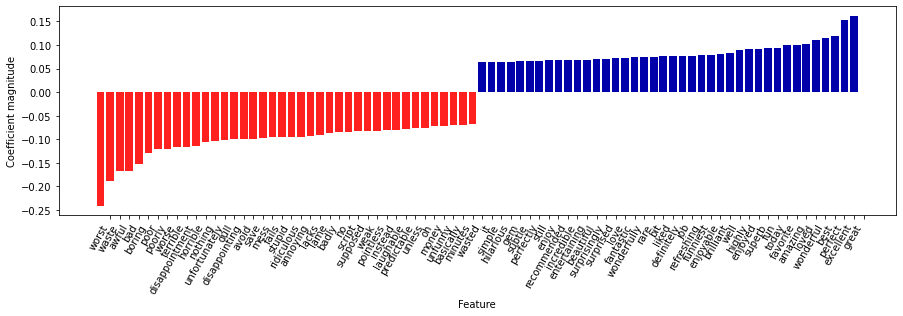

In [38]:
mglearn.tools.visualize_coefficients(
    grid.best_estimator_.named_steps['logisticregression'].coef_, 
    feature_names, n_top_features=40)

In [39]:
vector = CountVectorizer(ngram_range=(2, 2)).fit(few_words)
print('Размер словаря: {}'.format(len(vector.vocabulary_)))
print('Словарь:\n{}'.format(vector.get_feature_names()))

print('Преобразованные уплотнённые данные:\n{}'.format(vector.transform(few_words).toarray()))

Размер словаря: 14
Словарь:
['be fool', 'but the', 'doth think', 'fool doth', 'he is', 'himself to', 'is wise', 'knows himself', 'man knows', 'the fool', 'the wise', 'think he', 'to be', 'wise man']
Преобразованные уплотнённые данные:
[[0 0 1 1 1 0 1 0 0 1 0 1 0 0]
 [1 1 0 0 0 1 0 1 1 0 1 0 1 1]]


In [41]:
pipe = make_pipeline(TfidfVectorizer(min_df=5), LogisticRegression(n_jobs=-1, max_iter=700))
param_gr = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'tfidfvectorizer__ngram_range':[(1, 1), (1, 2), (1, 3)]}

grid = GridSearchCV(pipe, param_gr, cv=5)
grid.fit(text_train, y_train)
print('Наилучшее значение перекрёстной проверки: {:.2f}'.format(grid.best_score_))
print('Наилучшие параметры:\n{}'.format(grid.best_params_))

Наилучшее значение перекрёстной проверки: 0.91
Наилучшие параметры:
{'logisticregression__C': 100, 'tfidfvectorizer__ngram_range': (1, 3)}


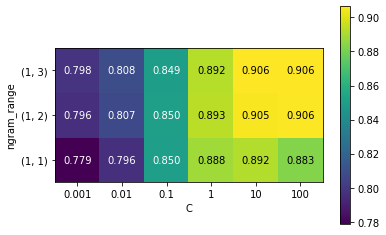

In [45]:
scores = grid.cv_results_['mean_test_score'].reshape(-1, 3).T
heatmap = mglearn.tools.heatmap(
    scores, xlabel='C', ylabel='ngram_range', cmap='viridis', fmt='%.3f',
    xticklabels=param_gr['logisticregression__C'],
    yticklabels=param_gr['tfidfvectorizer__ngram_range'])
plt.colorbar(heatmap)

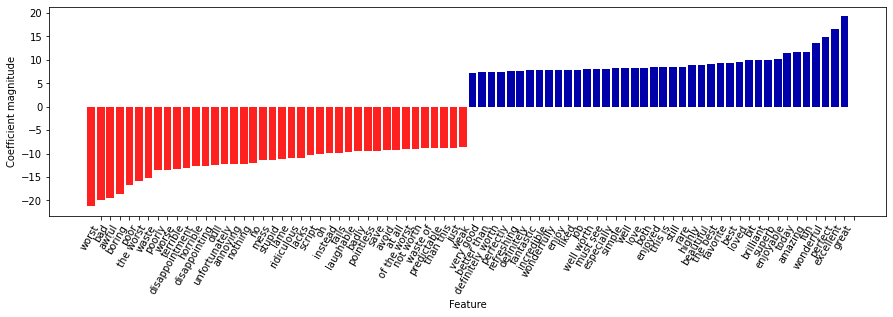

In [46]:
vect = grid.best_estimator_.named_steps['tfidfvectorizer']
feature_names = np.array(vect.get_feature_names())
coef = grid.best_estimator_.named_steps['logisticregression'].coef_
mglearn.tools.visualize_coefficients(coef, feature_names, n_top_features=40)

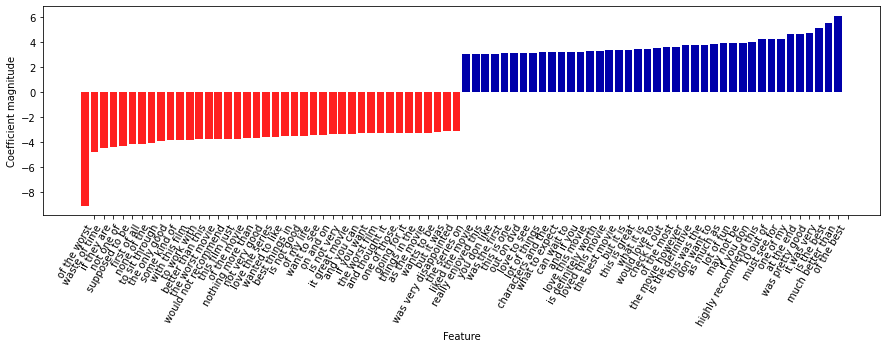

In [47]:
mask = np.array([len(feature.split(' ')) for feature in feature_names]) == 3
mglearn.tools.visualize_coefficients(coef.ravel()[mask],
    feature_names[mask], n_top_features=40)

In [5]:
import spacy
import nltk
import re
# regexp used in CountVectorizer:
regexp = re.compile('(?u)\\b\\w\\w+\\b')
# load spacy language model
en_nlp = spacy.load('en_core_web_trf', disable=['parser', 'ner'])
old_tokenizer = en_nlp.tokenizer
# replace the tokenizer with the preceding regexp
en_nlp.tokenizer = lambda string: old_tokenizer.tokens_from_list(
    regexp.findall(string))

# create a custom tokenizer using the SpaCy document processing pipeline
# (now using our own tokenizer)
def custom_tokenizer(document):
    doc_spacy = en_nlp(document)
    return [token.lemma_ for token in doc_spacy]

# define a count vectorizer with the custom tokenizer
lemma_vect = CountVectorizer(tokenizer=custom_tokenizer, min_df=5)